In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import random
from sklearn import linear_model
from sklearn.impute import SimpleImputer

In [2]:
#df = pd.read_csv('statistic_sample1.csv')
#df['Internal migrants  Both sexes'] = df['Internal migrants  Both sexes'].str.replace(',', '').astype(int)
#df['Japanese population  Both sexes[thousands]'] = df['Japanese population  Both sexes[thousands]'].str.replace(',', '').astype(int)

In [3]:
#corr1 = np.corrcoef(df['Internal migrants  Both sexes'], df['Japanese population  Both sexes[thousands]'])
#corr1

In [4]:
#plt.scatter(df['Internal migrants  Both sexes'], df['Japanese population  Both sexes[thousands]'])

In [5]:
#corr1, p = st.pearsonr(df['Internal migrants  Both sexes'], df['Japanese population  Both sexes[thousands]'])
#corr1, p

In [8]:
#データの補充
#df['Change from previous year  Both sexes[%]'] = df['Change from previous year  Both sexes[%]'].astype(float)
#df['Change from previous year  Both sexes[%]'] = df['Change from previous year  Both sexes[%]'].fillna(df['Change from previous year  Both sexes[%]'].mean())

In [9]:
#重解析
#model = linear_model.LinearRegression()
#df2_train = df.loc[:,['Change from previous year  Both sexes[%]', 'Japanese population  Both sexes[thousands]']]
#df2_target = df['Internal migrants  Both sexes']

In [10]:
#model.fit(df2_train, df2_target)
#df_result = pd.DataFrame({'Name':df2_train.columns, 'Coefficients': model.coef_[0]})
#df_result

In [11]:
#model.intercept_[0].round(4)

In [12]:
df = pd.read_csv("http://mcobaya.web.fc2.com/table6-1.csv")

In [13]:
df

,X,Y
0,5,12
1,2,5
2,9,12
3,1,2
4,3,3
5,4,6
6,8,15
7,11,14
8,6,5
9,7,10


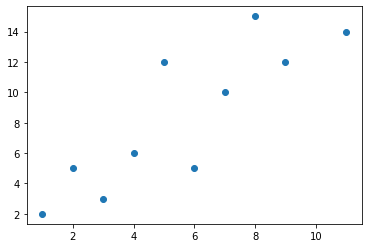

In [17]:
plt.scatter(df['X'], df['Y'])

In [2]:
df = pd.read_csv("http://mcobaya.web.fc2.com/educ2.csv", encoding= 'shift-jis')

In [3]:
df.head(5)

,pref,inc,enr,stu,univ,cpi
0,北海道,2476,40.4,12.6,0.65,99.3
1,青森,2333,41.9,12.4,0.73,99.8
2,岩手,2309,41.1,12.4,0.38,98.7
3,宮城,2455,45.5,13.6,0.60,98.0
4,秋田,2302,44.5,12.0,0.55,97.5


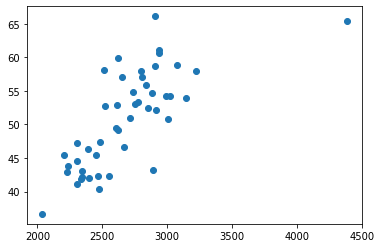

In [4]:
plt.scatter(df['inc'], df['enr'])

# df['inc']を使ってt値、p値を求めて母平均の検定をしてみる

In [5]:
population_mean = np.mean(df['inc'])
sample = sample = df['inc'].sample(n = 40)
sample_mean = np.mean(sample)
print(population_mean, sample_mean)

2684.808510638298 2652.275


In [6]:
sample_std = np.std(sample)
print(sample_std)

290.03680693146515


In [7]:
#t値を計算。　正直あんま使わん
t = (sample_mean - population_mean) / (sample_std/np.sqrt(len(sample)))
print(t)

-0.7094271584823324


In [8]:
#母平均とサンプル平均が同じであるというのをnull hypothesisとしてt検定をしてみる
#t検定に必要な情報は,サンプル平均、予想した母分散平均、サンプルstd, サンプル数だが、sampleをそのままぶち込むことができるので、
#ほかに必要なのは予想する母平均だけである。
t_value, p_value = st.ttest_1samp(sample, population_mean)
print(p_value)

0.48777142793356176


# 単回帰分析(独立変数が1つ)をやってみる

In [9]:
model = linear_model.LinearRegression()
#you need [[]]
model = model.fit(df[['inc']], df[['enr']])

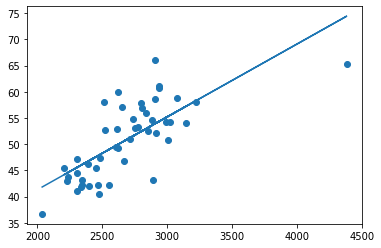

Coefficient: [[0.01389755]]
Intercept: [13.51539941]


In [10]:
plt.scatter(df['inc'], df['enr'])
plt.plot(df[['inc']], model.predict(df[['inc']]), linestyle="solid")
plt.show()
print('Coefficient:', str(model.coef_))
print('Intercept:', str(model.intercept_))

In [11]:
#predictをしてみる
random_num = random.randint(0,46)
pred = model.predict([[df['inc'][random_num]]])
print('actual number', str(df['enr'][random_num]))
print('predicted number', str(pred))

actual number 42.0
predicted number [[46.88341664]]


# 重解析をやってみる

In [32]:
df_train = df.loc[:,['inc','enr','stu','cpi']]

In [13]:
model = linear_model.LinearRegression()
model = model.fit(df_train, df[['univ']])

In [14]:
print('Coefficient:', str(model.coef_))
print('Intercept:', str(model.intercept_))

Coefficient: [[7.86274703e-06 9.98787393e-03 1.16146434e-02 8.23614655e-03]]
Intercept: [-0.94975634]


# 東京という外れ値を除去して重解析をやってみる

In [18]:
df[df['pref']=='東京']

,pref,inc,enr,stu,univ,cpi
12,東京,4383,65.4,16.8,1.05,106.5


In [19]:
df_46 = df.drop([12])

In [20]:
len(df_46)

46

In [25]:
df_train_46 = df_46.loc[:,['inc','enr','stu','cpi']]
model = linear_model.LinearRegression()
model = model.fit(df_train_46, df_46[['univ']])
print('Coefficient:', str(model.coef_))
print('Intercept:', str(model.intercept_))

Coefficient: [[-0.0001822   0.01493081  0.01007224 -0.00062074]]
Intercept: [0.20346748]


#### 解析にもp値が存在していてnull hypothesisがcoefficient=0。つまりそれぞれの係数が全く目的関数に影響を与えない確率がP-valueとなる

# sklearnのmodelを使っても、coefficientとinterceptは出ても、p-valueは出ないっぽいので statsmodelを使ってやってみる

In [28]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [29]:
X_stat = sm.add_constant(df_train)
Y_stat = df[['univ']]

C:\Users\daisuke\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [30]:
# 最小二乗法でモデル化
model_stat = sm.OLS(Y_stat, X_stat)
result_stat = model_stat.fit()

# 重回帰分析の結果を表示する
result_stat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   univ   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     2.452
Date:                Thu, 22 Oct 2020   Prob (F-statistic):             0.0606
Time:                        13:08:30   Log-Likelihood:                 11.308
No. Observations:                  47   AIC:                            -12.62
Df Residuals:                      42   BIC:                            -3.366
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9498      1.447     -0.656      0.515      -3.870       1.971
inc         7.863e-06      0.000      0.062      0.951      -0.000       0.000
enr            0.0100      0.006      1.557      0.127      -0.003       0.023
stu            0.0116      0.030      0.387      0.700      -0.049       0.072
cpi            0.0082      0.015      0.545      0.589      -0.022       0.039
==============================================================================
Omnibus:                        0.927   Durbin-Watson:                   2.439
Prob(Omnibus):                  0.629   Jarque-Bera (JB):                0.996
Skew:                           0.279   Prob(JB):                        0.608
Kurtosis:                       2.557   Cond. No.                     1.34e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### abs(t)< 2 の時,coefficent = 0の時が結構ある。abs(t) < 2 は p> 0.05と同じと判断する。
• 質問：ｔ値が２より大きいのにｐ値が 0.05 より大きいということはありますか。
回答：サンプルサイズが小さい（30 以下）ときにはありえます。そのときは P 値で判断
してください。
• 質問：逆に、ｔ値が２より小さいのにｐ値が 0.05 より小さいということはありますか。
回答：通常の回帰分析ではありえません。
